In [1]:
#load libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import ttest_ind
from scipy import stats

In [2]:
#load the data
df = pd.read_csv("cell_surface_area.csv")
df = pd.DataFrame(df)

#split the data
df_superficial_and_core_only = df.drop(df[df.type == 'Leading_cell_external'].index)
df_superficial_and_core_only = df_superficial_and_core_only.drop(df[df.type == 'Leading_cell_area'].index)


In [8]:
#total external surface area of superficial cells:
df_superficial = df[df.type=="Superficial_cell_external"]


#total external surface area of neuromast cells:
df_neuromast = df[df.type=="Neuromast_cell_external"]


print('superficial external area mean: ' + str(round(df_superficial.area.mean(), 1)) + ' um2')

print('neuromast external area mean: ' + str(round(df_neuromast.area.mean(),1)) + ' um2')


print('superficial total external area mean: ' + str(round(df_superficial.area.sum(),1)) + ' um2')

print('neuromast total external area : ' + str(round(df_neuromast.area.sum(),1)) + ' um2')

#statistical significance of average cell external area

print('total number of neuromast cells: ' + str(len(df_neuromast)))
print('tlta number of superficial cells: ' + str(len(df_superficial)))


superficial external area mean: 54.0 um2
neuromast external area mean: 20.9 um2
superficial total external area mean: 2320.5 um2
neuromast total external area : 1338.5 um2
total number of neuromast cells: 64
tlta number of superficial cells: 43


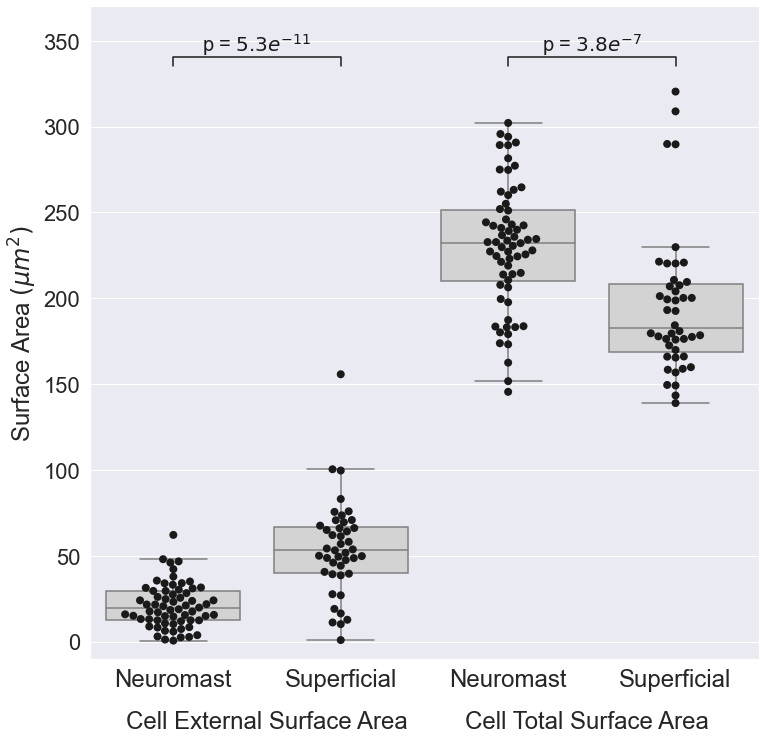

In [7]:

fig, ax = plt.subplots(figsize = (12,12))

sns.set(style="ticks", palette="pastel")
sns.set(font_scale = 2)

myPlot = sns.boxplot(x=df_superficial_and_core_only["type"], y=df_superficial_and_core_only["area"], palette=["lightgray", "lightgray"], showfliers=False)

#overlay a swarmplot
myPlot = sns.swarmplot(x=df_superficial_and_core_only["type"], y=df_superficial_and_core_only["area"], palette=["k", "k"], marker = "o", alpha = 1, size=8)


ax.set_xticklabels(("Neuromast", "Superficial", "Neuromast", "Superficial"), size = 24)

#set the axis names
plt.ylabel("Surface Area $(\mu m^{2})$", fontdict={'fontsize' : 24})
plt.xlabel("")


plt.ylim(ymax = 370, ymin = -10)

fig.text(0.33, .045, 'Cell External Surface Area', ha='center', fontsize=24)


fig.text(0.7, .045, 'Cell Total Surface Area', ha='center', fontsize=24)

#add statistics (from tests below)
x1, x2 = 0, 1
y, h, col = df['area'].max() + 15, 5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.01, "p = $5.3e^{-11}$", ha='center', va='bottom', color=col, fontsize = 20)


x1, x2 = 2, 3
y, h, col = df['area'].max() + 15, 5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.01, "p = $3.8e^{-7}$", ha='center', va='bottom', color=col, fontsize = 20)


figure = myPlot.get_figure()
figure.savefig("SurfaceArea.png",dpi=800)

In [8]:
#statistics

nm_ext = df.drop(df[df.type != 'Neuromast_cell_external'].index)['area']
superficial_ext = df.drop(df[df.type != 'Superficial_cell_external'].index)['area']
leading_ext = df.drop(df[df.type != 'Leading_cell_external'].index)['area']

nm_total =  df.drop(df[df.type != 'Neuromast_cell_area'].index)['area']
superficial_total = df.drop(df[df.type != 'Superficial_cell_area'].index)['area']
leading_total =  df.drop(df[df.type != 'Leading_cell_area'].index)['area']



                                                                  


p-value for non-normality is 0.04873109236359596


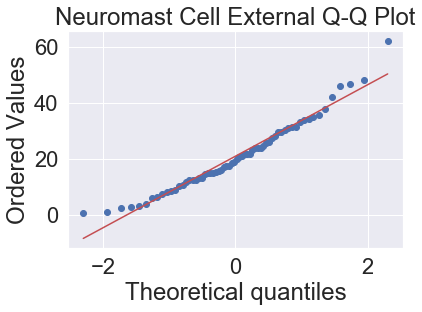

In [9]:
stats.probplot(nm_ext, plot= plt)
plt.title('Neuromast Cell External Q-Q Plot')
print('p-value for non-normality is ' + str(stats.shapiro(nm_ext)[1]))

p-value for non-normality is 0.008722130209207535


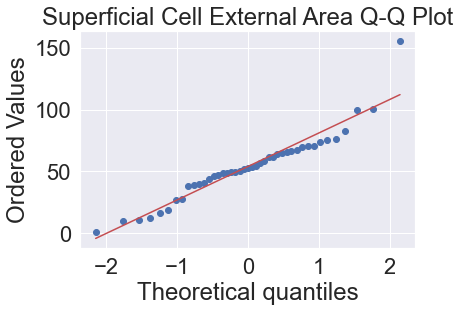

In [49]:
stats.probplot(superficial_ext, plot= plt)
plt.title('Superficial Cell External Area Q-Q Plot')
print('p-value for non-normality is ' + str(stats.shapiro(superficial_ext)[1]))                                                                  

p-value for non-normality is 0.3228757381439209


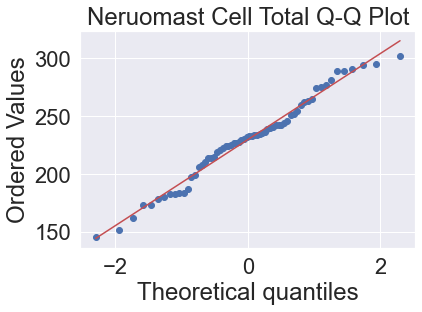

In [47]:
stats.probplot(nm_total, plot= plt)
plt.title('Neruomast Cell Total Q-Q Plot')
print('p-value for non-normality is ' + str(stats.shapiro(nm_total)[1]))                                                                  

p-value for non-normality is 5.3259864216670394e-05


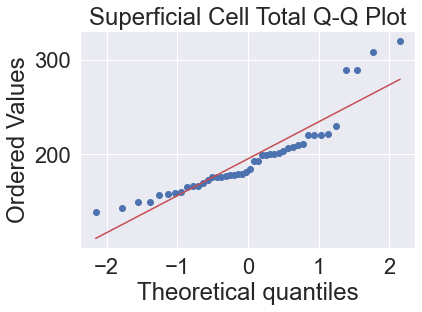

In [48]:
stats.probplot(superficial_total, plot= plt)
plt.title('Superficial Cell Total Q-Q Plot')
print('p-value for non-normality is ' + str(stats.shapiro(superficial_total)[1]))                                                                  

In [ ]:
#all except nm_total fail non-normality test, so use nonparametric mann whitney U test

In [51]:
#mann whitnet U test for total areas

stats.mannwhitneyu(superficial_total, nm_total)


MannwhitneyuResult(statistic=616.5, pvalue=3.7902252659625854e-07)

In [52]:
#mann whitnet U test for superficial areas

stats.mannwhitneyu(superficial_ext, nm_ext)

MannwhitneyuResult(statistic=359.0, pvalue=5.266645010153053e-11)